In [170]:
#import important libaries
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [7]:
#import the dataset
df = pd.read_csv("Clustered_df.csv")
df = df.drop(columns = ["Unnamed: 0"])
data = df[["age", "milage", "engine_size", "fuel_type", "Clusters"]]

In [16]:
#cheking the distribution to check for imbalance
data.Clusters.value_counts()

Clusters
1    523
0    292
2    133
Name: count, dtype: int64

In [26]:
new_df = pd.get_dummies(data, drop_first= True)

In [32]:
X = new_df.drop(columns = "Clusters")
y = new_df.Clusters

In [145]:
#splitting the dataset into train and test set
x_train, x_test, y_train, y_test = split(X, y, stratify= y, test_size = 0.25, random_state = 10)

In [147]:
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [149]:
rfc_score = rfc.score(x_test, y_test)

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [153]:
svc_score = svc.score(x_test, y_test)

In [155]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [157]:
lr_score = lr.score(x_test, y_test)

In [159]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [161]:
knn_score = knn.score(x_test, y_test)

In [188]:
#Stacking Classifier
base_learners = [
    ("knn", KNeighborsClassifier(n_neighbors= 30)),
    ("svc", SVC()),
    ("lr", RandomForestClassifier(n_estimators = 100)),
    ("Ada", AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100))
]

stacking = StackingClassifier(estimators= base_learners, final_estimator= LogisticRegression(max_iter= 100))
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=30)),
                               ('svc', SVC()), ('lr', RandomForestClassifier()),
                               ('Ada',
                                AdaBoostClassifier(learning_rate=0.1,
                                                   n_estimators=100))],
                   final_estimator=LogisticRegression())

In [174]:
stacking_score = stacking.score(x_test, y_test)
stacking_score

0.9704641350210971

In [190]:
#Table of all the scores
scores = {
    "Model": ["Random Forest", "SVC", "Logistic Regression", "KNN", "Stacking"],
    "Scores": [rfc_score, svc_score, lr_score, knn_score, stacking_score]
}
score_df = pd.DataFrame(scores)

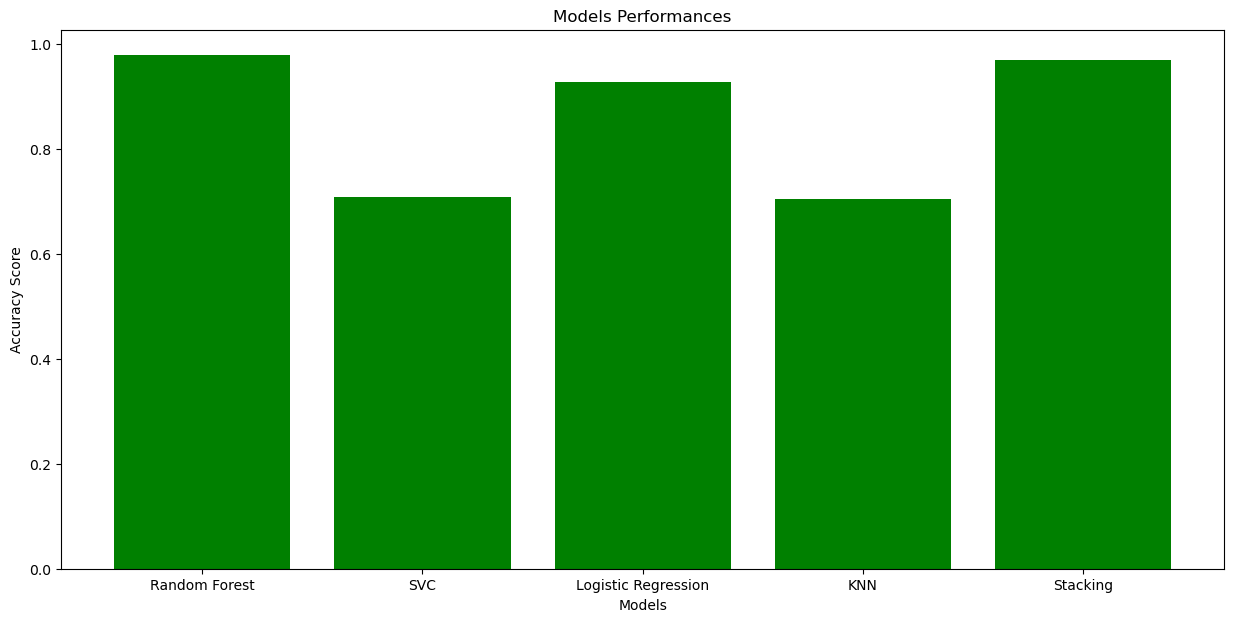

In [194]:
#Visualizing the scores
plt.figure(figsize=(15, 7))
plt.bar(score_df.Model, score_df.Scores, color = "g")
plt.title("Models Performances")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()